# step1: Import all important libraries

In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# step2: Import the dataset

In [2]:
df=pd.read_csv(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\datasets\polynomial regression\Advertising.csv")

# step3: data ovrview

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# step4: eda(exploratory data analysis)

# step5: determine the features and target variable

In [10]:
X=df.drop("sales",axis=1)
y=df["sales"]

In [11]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Step6: Preprocessing or making polynomial features

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [17]:
poly_features=polynomial_converter.fit_transform(X)

In [19]:
poly_features.shape
# X1, X2,X3, X1^2, X2^2,X3^2,X1X2,X1X3,X2X3

(200, 9)

In [20]:
X.shape
# X1,X2,X3

(200, 3)

In [24]:
poly_features.head()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [40]:
import pandas as pd

# Convert the numpy array to a DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=polynomial_converter.get_feature_names_out(input_features=X.columns))

# Now you can use the head() method to display the first few rows
print(poly_features_df.head())


      TV  radio  newspaper      TV^2  TV radio  TV newspaper  radio^2  \
0  230.1   37.8       69.2  52946.01   8697.78      15922.92  1428.84   
1   44.5   39.3       45.1   1980.25   1748.85       2006.95  1544.49   
2   17.2   45.9       69.3    295.84    789.48       1191.96  2106.81   
3  151.5   41.3       58.5  22952.25   6256.95       8862.75  1705.69   
4  180.8   10.8       58.4  32688.64   1952.64      10558.72   116.64   

   radio newspaper  newspaper^2  
0          2615.76      4788.64  
1          1772.43      2034.01  
2          3180.87      4802.49  
3          2416.05      3422.25  
4           630.72      3410.56  


# Step7: split the data  to train and test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

# Step8: train the model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
polymodel=LinearRegression()

In [34]:
polymodel.fit(X_train,y_train)

LinearRegression()

# step9: predicting test data

In [36]:
y_pred=polymodel.predict(X_test)

In [43]:
pd.DataFrame({"Y_test":y_test,"Y_pred":y_pred,"residuals":(y_test-y_pred)}).head()

,Y_test,Y_pred,residuals
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891


# step10: Evaluating the model

In [44]:
from sklearn import metrics

In [45]:
MAE_poly=metrics.mean_absolute_error(y_test,y_pred)
MSE_poly=metrics.mean_squared_error(y_test,y_pred)
RMSE_poly=np.sqrt(MSE_poly)

pd.DataFrame([MAE_poly,MSE_poly,RMSE_poly],index=["MAE","MSE","RMSE"],columns=["metrics"])

,metrics
MAE,0.489680
MSE,0.441751
RMSE,0.664643


# comparing of simple linear regression with polynomial regression

### making simple linear regression

In [49]:
XS_train,XS_test,ys_train,ys_test=train_test_split(X,y,test_size=0.3,random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train,ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple=metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple=metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple=np.sqrt(MSE_simple)

In [50]:
pd.DataFrame({"Poly_metrics":[MAE_poly,MSE_poly,RMSE_poly],"Simple_metrics":[MAE_simple,MSE_simple,RMSE_simple]},
             index=["MAE","MSE","RMSE"])

,Poly_metrics,Simple_metrics
MAE,0.489680,1.213746
MSE,0.441751,2.298717
RMSE,0.664643,1.516152


# step11: adjusting model paramtres

In [54]:
train_RMSE_list=[]
test_RMSE_list=[]

for d in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    polymodel=LinearRegression()
    polymodel.fit(X_train,y_train)
    
    y_pred_train=polymodel.predict(X_train)
    y_pred_test=polymodel.predict(X_test)
    
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    
    train_RMSE_list.append(train_RMSE)
    
    test_RMSE_list.append(test_RMSE)   

In [55]:
train_RMSE_list

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421605861405707,
 0.14230664746636695,
 0.16654061493026728]

In [56]:
test_RMSE_list

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.1253807267562,
 4449.534183016097,
 95891.22793918141]

# Plot the polynomial degree and RMSE

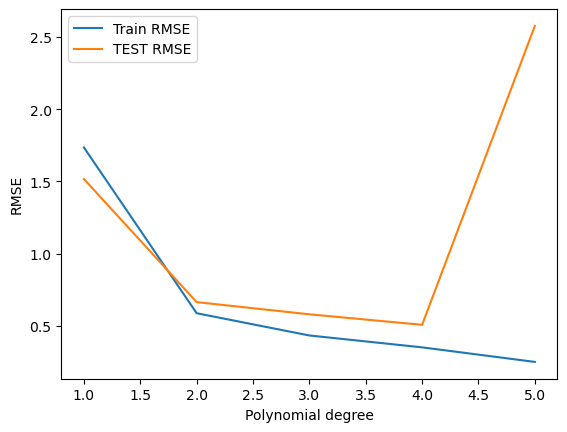

In [58]:
plt.plot(range(1,6),train_RMSE_list[:5],label="Train RMSE")
plt.plot(range(1,6),test_RMSE_list[:5],label="TEST RMSE")

plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")
plt.legend()

# Step12: Finalizing model paramtres

In [59]:
final_polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)
final_polynomial_features=final_polynomial_converter.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(final_polynomial_features,y,test_size=0.3,random_state=101)

final_poly_model=LinearRegression()
final_poly_model.fit(X_train,y_train)

LinearRegression()

# step13: saving and deployment of our model

In [60]:
from joblib import dump, load

In [62]:
dump(final_poly_model,r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\proj\sales.joblib")

['E:\\my courses\\courses\\mine\\ai\\Machine Learning\\machine learning\\proj\\sales.joblib']

In [63]:
dump(final_polynomial_converter,r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\proj\poly_converter.joblib")

['E:\\my courses\\courses\\mine\\ai\\Machine Learning\\machine learning\\proj\\poly_converter.joblib']

# deployment

In [64]:
load_converter=load(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\proj\poly_converter.joblib")

In [65]:
load_polymodel=load(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\proj\sales.joblib")

In [67]:
campaign=[[144,30,12]]

In [72]:
campaign_poly=load_converter.transform(campaign)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [77]:
load_polymodel.predict(campaign_poly)

array([15.98267837])